# Pymaceuticals Inc.
---
The objective of the study is to find ouot how each drug impacts the volume of tumor throughout time points.

### Analysis

- First step data cleaning to eliminate a duplicate mouse
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mouse = merged_data['Mouse ID'].value_counts()
len(num_mouse)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_row_df = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()

dup_row_df


array(['g989'], dtype=object)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_row_df[0]

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_row_all_col = merged_data.loc[merged_data['Mouse ID'] == dup_row_df[0],:]
dup_row_all_col

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_data_clean = merged_data.loc[merged_data['Mouse ID'] != dup_row_df[0],:]
merged_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mouse = merged_data_clean['Mouse ID'].value_counts()
len(num_mouse)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [9]:
merged_data_clean_dr = merged_data_clean.groupby('Drug Regimen')

merged_data_clean_dr_mean = merged_data_clean_dr['Tumor Volume (mm3)'].mean()
merged_data_clean_dr_median = merged_data_clean_dr['Tumor Volume (mm3)'].median()
merged_data_clean_dr_var = merged_data_clean_dr['Tumor Volume (mm3)'].var()
merged_data_clean_dr_std = merged_data_clean_dr['Tumor Volume (mm3)'].std()
merged_data_clean_dr_sem = merged_data_clean_dr['Tumor Volume (mm3)'].sem()

merged_data_clean_dr_sum = pd.DataFrame({ 'Mean Tumor Volume':merged_data_clean_dr_mean,  'Median Tumor Volume':merged_data_clean_dr_median,\
                            'Tumor Volume Variance':merged_data_clean_dr_var, 'Tumor Volume Std. Dev.': merged_data_clean_dr_std,\
                            'Tumor Volume Std. Err.':merged_data_clean_dr_sem})

merged_data_clean_dr_sum.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
merged_data_clean_dr_sum2 = merged_data_clean_dr.agg({'Tumor Volume (mm3)':['mean', 'median','std','var','std','sem']})
merged_data_clean_dr_sum2.head()

Tumor Volume (mm3)                                            \
                           mean     median       std        var       std   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  4.994774  24.947764  4.994774   
Ceftamin              52.591172  51.776157  6.268188  39.290177  6.268188   
Infubinol             52.884795  51.820584  6.567243  43.128684  6.567243   
Ketapril              55.235638  53.698743  8.279709  68.553577  8.279709   
Naftisol              54.331565  52.509285  8.134708  66.173479  8.134708   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466

## Bar and Pie Charts

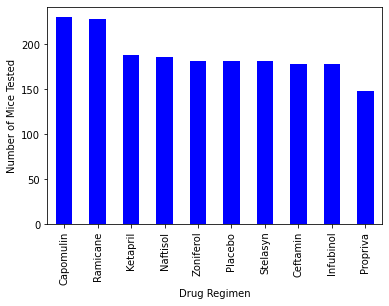

In [11]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# #Drug Regimen
#merged_data_clean_dr_sum['Drug Regimen']

merged_data_clean_dr = merged_data_clean.groupby('Drug Regimen')
merged_data_clean_dr_bar = merged_data_clean_dr.agg({'Timepoint':['count']})  
merged_data_clean_dr_bar = merged_data_clean_dr_bar.sort_values([('Timepoint', 'count')], ascending=False)

figure1 = merged_data_clean_dr_bar.plot(kind="bar", facecolor="blue", figsize=(6,4),legend=False)                          
xticklabels = merged_data_clean_dr_bar.index
# ylabel=plt.ylabel("Number of Mice Tested")
figure1.set_ylabel("Number of Mice Tested")

plt.show()

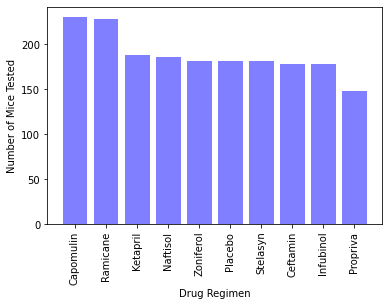

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = merged_data_clean_dr_bar.index
y_axis = merged_data_clean_dr_bar[('Timepoint', 'count')]
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
plt.xticks(rotation = 90)
plt.show()


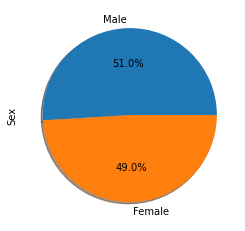

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = merged_data_clean['Sex'].unique()
pie_df = merged_data_clean['Sex'].value_counts()
xlabel = merged_data_clean['Sex'].unique()
figure1 = pie_df.plot(kind='pie', y=labels, autopct="%1.1f%%", shadow=True)
figure1.set_ylabel('Sex')
plt.show()

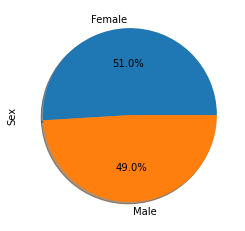

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = merged_data_clean['Sex'].unique()
plt.pie(merged_data_clean['Sex'].value_counts(), labels=labels, autopct="%1.1f%%", shadow=True)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Mouse ID	Drug Regimen	Sex	Age_months	Weight (g)	Timepoint	Tumor Volume (mm3)	Metastatic Sites
# 
# Mouse ID, Tumor Volume (mm3)
# tumor_vol_mouse = merged_data_clean.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].sum()
# tumor_vol_mouse.head(15)


# Start by getting the last (greatest) timepoint for each mouse
greatest_timept_mouse = pd.DataFrame(merged_data_clean.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max())
# greatest_timept_mouse
greatest_timept_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_groups_df = pd.merge(greatest_timept_mouse,merged_data_clean,on=['Drug Regimen','Mouse ID','Timepoint'])
merged_groups_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list =  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

for treatment in  treatment_list:
    tumor_vol = merged_groups_df.loc[merged_groups_df['Drug Regimen']== treatment,'Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(treatment)
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds
    for i in tumor_vol:
        if i < lower_bound or i >upper_bound:
            print('The potential Outlier is ' + str(i))
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #done above
    
    # add subset ???
    # Filter the merged DataFrame for the current treatment
    #treatment_data = merged_groups_df[merged_groups_df['Drug Regimen'] == treatment]
    
    # Get the final tumor volume for the current treatment
    #final_tumor_volume = treatment_data[treatment_data['Timepoint'== treatment_data['Timepoint'].max()]['Tumor Volume (mm3)'].values[0]
  #  final_tumor_volume = treatment_data[treatment_data['Time_Point'] == treatment_data['Time_Point'].max()]['Tumor_Volume'].values[0]

    # Append the final tumor volume to the tumor volume list
    tumor_vol_list.append(tumor_vol)
    
  
    

Capomulin
Ramicane
Infubinol
The potential Outlier is 36.321345799999996
Ceftamin


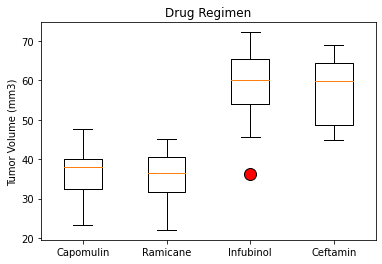

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# print(drug_reg)
#print(tumor_vol)
# print(tumor_vol_list)

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
red_circle = dict(markerfacecolor="red", marker="o", markersize=12)
ax1.boxplot(tumor_vol_list, flierprops=red_circle,labels=treatment_list)

plt.show()

## Line and Scatter Plots

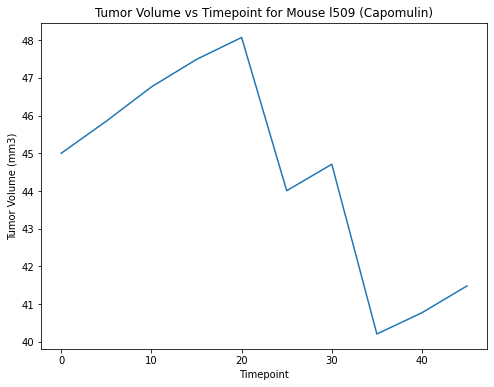

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


# Filter for mice treated with Capomulin
capomulin_data = merged_data_clean[merged_data_clean['Drug Regimen'] == 'Capomulin']

#capomulin_data['Mouse ID'].unique()

# Choose a mouse (e.g., Mouse ID 'l509') for plotting
treated_mouse = 'l509'

# Filter data for the selected mouse
treated_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == treated_mouse]


# Generate a line plot of tumor volume versus timepoint
plt.figure(figsize=(8, 6))
plt.plot(treated_mouse_data['Timepoint'], treated_mouse_data['Tumor Volume (mm3)'])
plt.title(f"Tumor Volume vs Timepoint for Mouse {treated_mouse} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


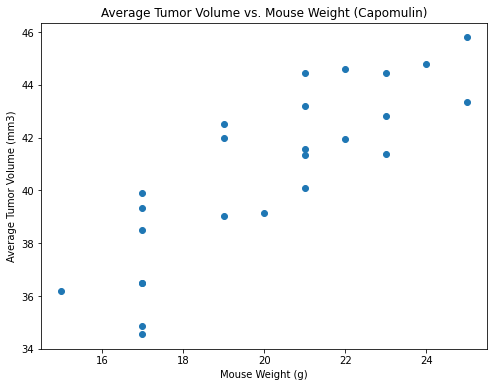

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Filter for mice treated with Capomulin
capomulin_data = merged_data_clean[merged_data_clean['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of average tumor volume vs. mouse weight
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

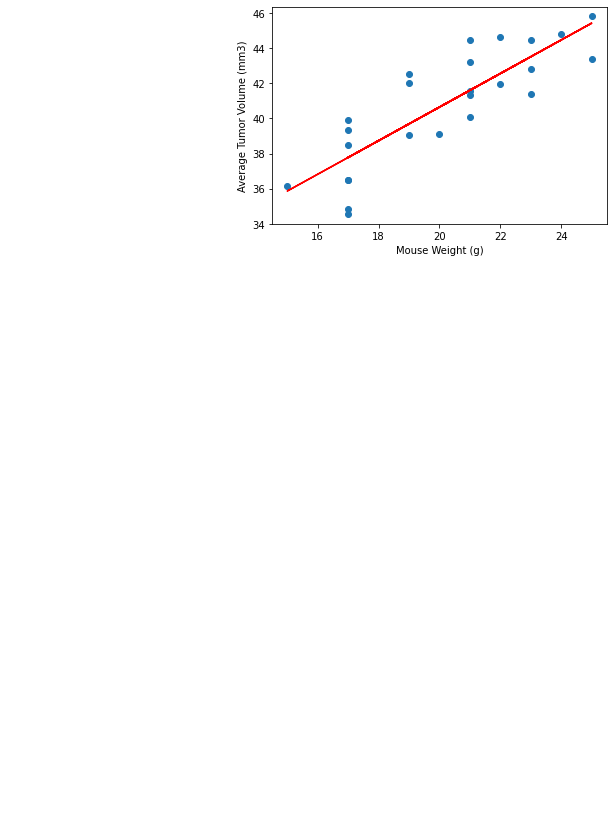

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Filter for mice treated with Capomulin
capomulin_data = merged_data_clean[merged_data_clean['Drug Regimen'] == 'Capomulin']

y_values = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
x_values = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()